In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.svm import SVC

In [2]:
train = []
test = []

with open('features.train', 'r') as f:
    for line in f:
        train.append([float(i) for i in line.split()])
with open('features.test', 'r') as f:
    for line in f:
        test.append([float(i) for i in line.split()])
        
train = np.array(train)
test = np.array(test)

In [3]:
x = []
y = []

for i in train:
    digit, intensity, symmetry = i[0], i[1], i[2]
    if digit == 0:
        y.append(1)
    else:
        y.append(-1)
    x.append([intensity, symmetry])

x = np.array(x)
y = np.array(y)

In [4]:
x_test = []
y_test = []

for i in test:
    digit, intensity, symmetry = i[0], i[1], i[2]
    if digit == 0:
        y_test.append(1)
    else:
        y_test.append(-1)
    x_test.append([intensity, symmetry])

x_test = np.array(x_test)
y_test = np.array(y_test)

In [5]:
G = [10**i for i in [0, 1, 2, 3, 4]]
print (G)

[1, 10, 100, 1000, 10000]


In [6]:
Eout = []
for i in G:
    # fit the model, don't regularize for illustration purposes
    clf = SVC(kernel='rbf', C=0.1, gamma=i)
    clf.fit(x, y)
    Eout.append(1-clf.score(x_test, y_test))

In [7]:
print (Eout)

[0.1071250622820129, 0.09915296462381662, 0.10513203786746383, 0.17887394120577982, 0.17887394120577982]


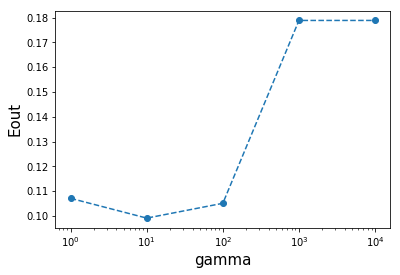

In [8]:
plt.semilogx(G, Eout, '--o')
plt.ylabel('Eout', fontsize = 15)
plt.xlabel('gamma', fontsize = 15)
plt.savefig('15.png')
plt.show()

1
10
100
501.18723362727246
1000
10000


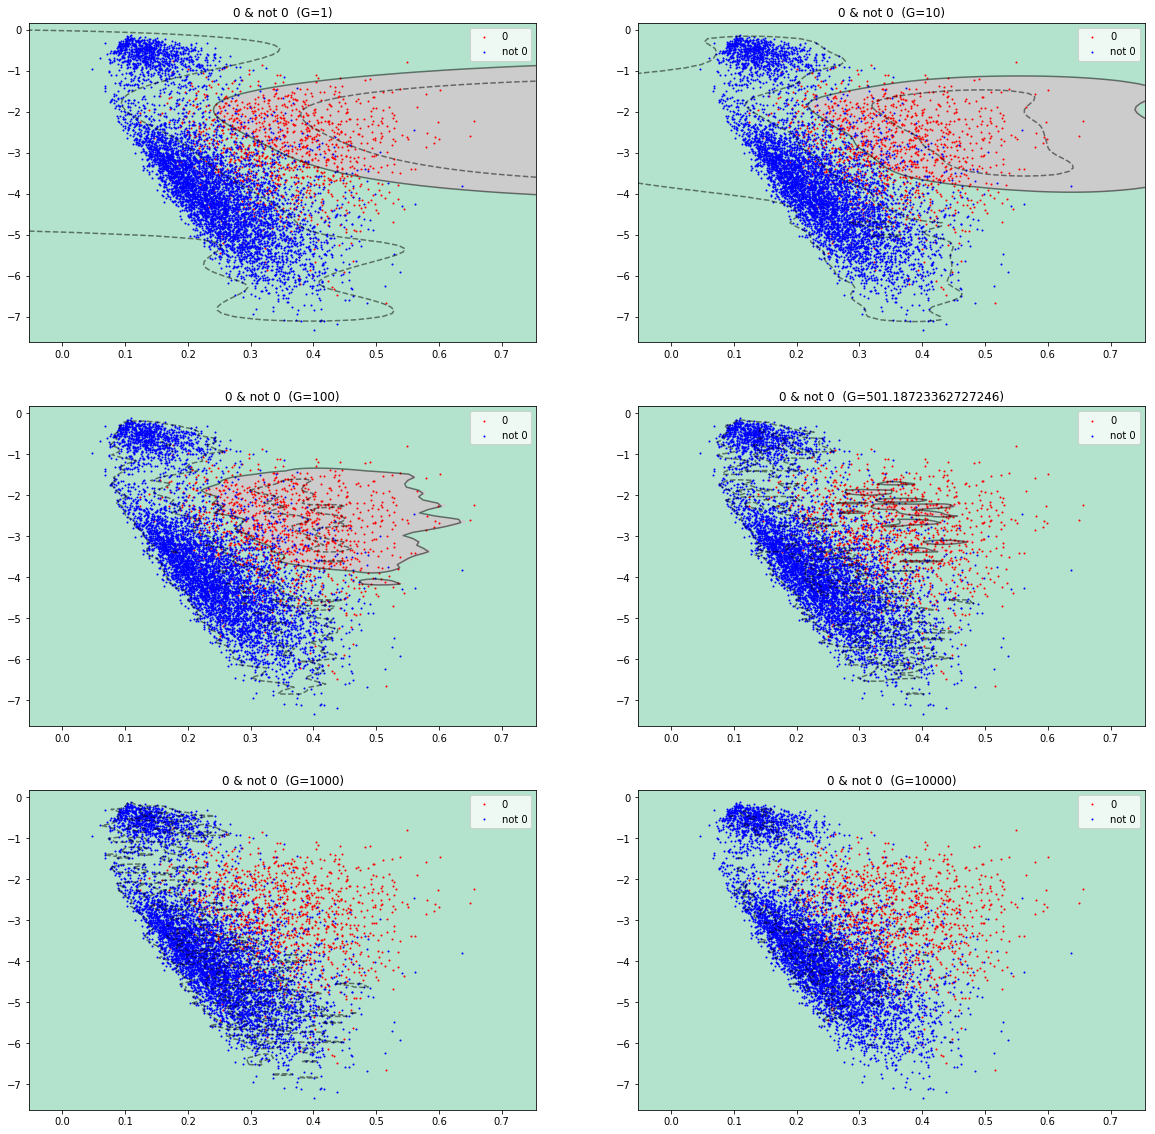

In [9]:
G = [10**i for i in [0, 1, 2, 2.7, 3, 4]]
plt.figure(figsize = (20, 20))
for j, i in enumerate(G):
    plt.subplot(3, 2, j+1)
    print (i)
    
    # fit the model, don't regularize for illustration purposes
    clf = SVC(kernel='rbf', C=0.1, gamma=i)
    clf.fit(x, y)
    
    h = .008
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.3, x[:, 1].max() + 0.3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('Pastel2'))
    
    # Plot the training points
    #'''
    x0 = []
    x_0 = []
    for ii, jj in zip(x, y):
        if jj == 1:
            x0.append(ii)
        else:
            x_0.append(ii)
    x0 = np.array(x0)
    x_0 = np.array(x_0)
    plt.scatter(x0[:,0], x0[:,1], c='r', s=1, label='0')
    plt.scatter(x_0[:,0], x_0[:,1], c='b', s=1, label='not 0')
    #'''
    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    #ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=1,
    #           linewidth=1, facecolors='none', c='g')

    plt.title('0 & not 0  (G=%s)' % str(i))
    plt.legend()

plt.savefig('15_all.png')
plt.show()